# Variational Quantum Classifier (VQC)

In [5]:
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import COBYLA
from qiskit.aqua.components.feature_maps import RawFeatureVector
from qiskit.ml.datasets import wine
from qiskit.circuit.library import TwoLocal

seed = 1376
aqua_globals.random_seed = seed

# Use Wine data set for training and test data
feature_dim = 4  # dimension of each data point
_, training_input, test_input, _ = wine(training_size=12,
                                        test_size=4,
                                        n=feature_dim)

feature_map = RawFeatureVector(feature_dimension=feature_dim)
vqc = VQC(COBYLA(maxiter=100),
          feature_map,
          TwoLocal(feature_map.num_qubits, ['ry', 'rz'], 'cz', reps=3),
          training_input,
          test_input)
result = vqc.run(QuantumInstance(BasicAer.get_backend('statevector_simulator'),
                                 shots=1024, seed_simulator=seed, seed_transpiler=seed))

print('Testing accuracy: {:0.2f}'.format(result['testing_accuracy']))

Testing accuracy: 1.00


In [81]:
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import COBYLA
from qiskit.aqua.components.feature_maps import RawFeatureVector
from qiskit.ml.datasets import ad_hoc_data
from qiskit.circuit.library import TwoLocal
from qiskit.aqua.components.feature_maps import SecondOrderExpansion

seed =  10598
#seed = 1376
aqua_globals.random_seed = seed

feature_dim = 2 # dimension of each data point
training_dataset_size = 20
testing_dataset_size = 10
#random_seed = 10598
#shots = 1024

_, training_input, test_input, _ = ad_hoc_data(training_size=training_dataset_size, 
                                               test_size=testing_dataset_size, n=feature_dim, gap=0.3)


#feature_map = RawFeatureVector(feature_dimension=feature_dim)

feature_map = SecondOrderExpansion(feature_dimension=feature_dim, depth=2, entangler_map=None, entanglement='full')
vqc = VQC(COBYLA(maxiter=100),
          feature_map,
          TwoLocal(feature_map.num_qubits, ['ry', 'rz'], 'cz', reps=3),
          training_input,
          test_input)
#result = vqc.run(QuantumInstance(BasicAer.get_backend('qasm_simulator'),
#                                 shots=1024, seed_simulator=seed, seed_transpiler=seed))
result = vqc.run(QuantumInstance(BasicAer.get_backend('qasm_simulator'),
                                 shots=1024, seed_simulator=seed, seed_transpiler=seed))

print('Testing accuracy: {:0.2f}'.format(result['testing_accuracy']))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: The qiskit.aqua.components.feature_maps.SecondOrderExpansion object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.ZZFeatureMap instead.
C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\components\feature_maps\second_order_expansion.py:59: DeprecationWarning: The qiskit.aqua.components.feature_maps.PauliZExpansion class is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.PauliFeatureMap instead.
  z_order=2, data_map_func=data_map_func)
C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\components\feature_maps\pauli_z_expansion.py:71: DeprecationWarning: The qiskit.aqua.components.feature_maps.PauliExpansion object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.libr

Testing accuracy: 1.00


In [82]:
from qiskit import Aer
from qiskit.aqua.utils import split_dataset_to_data_and_labels

In [83]:
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input, class_names=None)
print(datapoints[1])

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [84]:
predicted_probs, predicted_labels = vqc.predict(datapoints[0])
#predicted_classes = map_label_to_class_name(predicted_labels, vqc.label_to_class)
print("prediction:   {}".format(predicted_labels))

prediction:   [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [85]:
l=len(predicted_labels)
l
#datapoints[1][13]

20

In [86]:
for i in range(0,l):
    print(datapoints[0][i], 'actual class', datapoints[1][i], 'predicted', predicted_labels[i])
    #if datapoints[1][i] == predicted_labels[i]:
        

[3.58141563 2.26194671] actual class 0 predicted 0
[3.20442451 3.33008821] actual class 0 predicted 0
[1.13097336 1.63362818] actual class 0 predicted 0
[2.89026524 0.87964594] actual class 0 predicted 0
[6.1575216  1.13097336] actual class 0 predicted 0
[5.65486678 6.22035345] actual class 0 predicted 0
[4.58672527 3.83274304] actual class 0 predicted 0
[1.50796447 0.56548668] actual class 0 predicted 0
[6.09468975 0.62831853] actual class 0 predicted 0
[2.82743339 1.13097336] actual class 0 predicted 0
[1.38230077 4.52389342] actual class 1 predicted 1
[3.89557489 4.46106157] actual class 1 predicted 1
[5.46637122 3.0787608 ] actual class 1 predicted 1
[1.31946891 4.52389342] actual class 1 predicted 1
[3.89557489 5.02654825] actual class 1 predicted 1
[5.40353936 3.0787608 ] actual class 1 predicted 1
[5.65486678 5.90619419] actual class 1 predicted 1
[5.27787566 2.38761042] actual class 1 predicted 1
[0.31415927 2.45044227] actual class 1 predicted 1
[4.39822972 0.37699112] actual 

In [87]:
datapoints_train, class_to_label_train = split_dataset_to_data_and_labels(training_input, class_names=None)
print(datapoints_train[1])
print(datapoints_train[0])
print(len((datapoints_train[1])))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
[[2.82743339 4.90088454]
 [0.25132741 2.70176968]
 [5.65486678 6.1575216 ]
 [5.27787566 4.33539786]
 [5.96902604 0.06283185]
 [3.39292007 2.0106193 ]
 [4.46106157 4.77522083]
 [5.02654825 3.64424748]
 [1.38230077 0.69115038]
 [4.90088454 0.31415927]
 [3.01592895 0.62831853]
 [2.82743339 4.90088454]
 [0.75398224 1.75929189]
 [5.96902604 3.20442451]
 [0.75398224 1.69646003]
 [0.62831853 0.12566371]
 [4.52389342 2.19911486]
 [1.75929189 1.50796447]
 [3.51858377 2.38761042]
 [1.63362818 1.50796447]
 [0.06283185 5.0893801 ]
 [1.44513262 1.0681415 ]
 [0.25132741 1.31946891]
 [4.39822972 0.50265482]
 [4.33539786 5.34070751]
 [2.95309709 4.33539786]
 [5.90619419 3.01592895]
 [1.44513262 2.63893783]
 [2.32477856 2.57610598]
 [3.83274304 0.9424778 ]
 [5.52920307 2.95309709]
 [2.70176968 3.95840674]
 [1.88495559 2.57610598]
 [3.89557489 3.64424748]
 [2.76460154 2.45044227]
 [1.0681415  1.13097336]
 [4.77522083 1.31

0


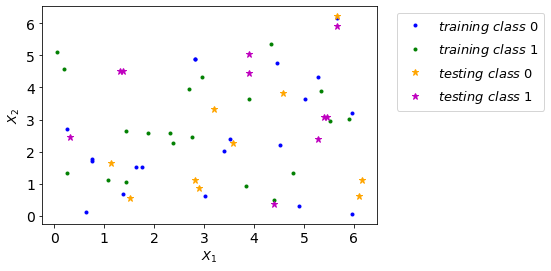

In [89]:
import numpy as np
import math 
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize, minimize_scalar
from scipy import integrate
%matplotlib inline

#plt.rcParams.update({'font.size': 14})
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 13}

mpl.rc('font', **font)

def example_inline():
    plt.clf()
x0_train=[]
y0_train=[]
x0_test=[]
y0_test=[]
x1_train=[]
y1_train=[]
x1_test=[]
y1_test=[]
    
#plt.figure(1)    
for i in range(0, len(datapoints_train[0])):
    if datapoints_train[1][i]==0 :
        x0_train.append(datapoints_train[0][i][0])
        y0_train.append(datapoints_train[0][i][1])
        
        #plt.plot(datapoints_train[0][i][0], datapoints_train[0][i][1], linestyle='', linewidth = 3, 
             #marker='o', markersize=3, color='blue', label= r'$Result ~from~ curve~ fitting$')
    else:
        x1_train.append(datapoints_train[0][i][0])
        y1_train.append(datapoints_train[0][i][1])
        #plt.plot(datapoints_train[0][i][0], datapoints_train[0][i][1], linestyle='', linewidth = 3, 
                 #marker='o', markersize=3, color='green', label= r'$Result ~from~ curve$')
        

        
for i in range(0, len(datapoints[0])):
    if datapoints[1][i]==0 :
        x0_test.append(datapoints[0][i][0])
        y0_test.append(datapoints[0][i][1])
        #plt.plot(datapoints[0][i][0], datapoints[0][i][1], linestyle='', linewidth = 3, 
             #marker='*', markersize=7, color='orange')
    else:
        x1_test.append(datapoints[0][i][0])
        y1_test.append(datapoints[0][i][1])
        #plt.plot(datapoints[0][i][0], datapoints[0][i][1], linestyle='', linewidth = 3, 
                 #marker='*', markersize=7, color='m')    
    #plt.xlabel(r'$\mathbf{X_1}$')
    #plt.ylabel(r'$\mathbf{x_2}$')
#plt.legend()
    #plt.show()
print(len(x0_train)-len(y0_train))

    
plt.figure(1)

plt.plot(x0_train, y0_train, linewidth = 3, linestyle='', marker='o', markersize=3, color='b', label= r'$training ~class~ 0$')

plt.plot(x1_train, y1_train, linewidth = 3, linestyle='', marker='o', markersize=3, color='green', label= r'$training ~class~ 1$')

plt.plot(x0_test, y0_test, linewidth = 3, linestyle='', marker='*', markersize=7, color='orange', label= r'$testing ~class~ 0$')

plt.plot(x1_test, y1_test, linewidth = 3, linestyle='', marker='*', markersize=7, color='m', label= r'$testing ~class~ 1$')

plt.ylabel(r'$X_2$')
plt.xlabel(r'$X_1$')
#plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()
    


0


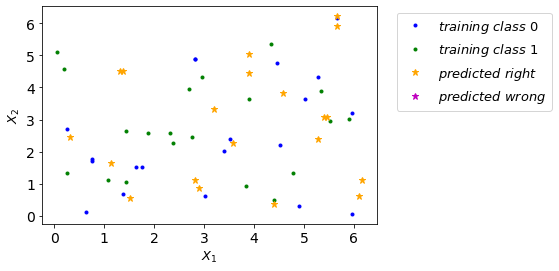

In [88]:
import numpy as np
import math 
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize, minimize_scalar
from scipy import integrate
%matplotlib inline

#plt.rcParams.update({'font.size': 14})
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 13}

mpl.rc('font', **font)

def example_inline():
    plt.clf()
x0_train=[]
y0_train=[]
x0_test=[]
y0_test=[]
x1_train=[]
y1_train=[]
x1_test=[]
y1_test=[]
    
#plt.figure(1)    
for i in range(0, len(datapoints_train[0])):
    if datapoints_train[1][i]==0 :
        x0_train.append(datapoints_train[0][i][0])
        y0_train.append(datapoints_train[0][i][1])
        
        #plt.plot(datapoints_train[0][i][0], datapoints_train[0][i][1], linestyle='', linewidth = 3, 
             #marker='o', markersize=3, color='blue', label= r'$Result ~from~ curve~ fitting$')
    else:
        x1_train.append(datapoints_train[0][i][0])
        y1_train.append(datapoints_train[0][i][1])
        #plt.plot(datapoints_train[0][i][0], datapoints_train[0][i][1], linestyle='', linewidth = 3, 
                 #marker='o', markersize=3, color='green', label= r'$Result ~from~ curve$')
        

        
for i in range(0, len(datapoints[0])):
    if datapoints[1][i]==predicted_labels[i] :
        x0_test.append(datapoints[0][i][0])
        y0_test.append(datapoints[0][i][1])
        #plt.plot(datapoints[0][i][0], datapoints[0][i][1], linestyle='', linewidth = 3, 
             #marker='*', markersize=7, color='orange')
    else:
        x1_test.append(datapoints[0][i][0])
        y1_test.append(datapoints[0][i][1])
        #plt.plot(datapoints[0][i][0], datapoints[0][i][1], linestyle='', linewidth = 3, 
                 #marker='*', markersize=7, color='m')    
    #plt.xlabel(r'$\mathbf{X_1}$')
    #plt.ylabel(r'$\mathbf{x_2}$')
#plt.legend()
    #plt.show()
print(len(x0_train)-len(y0_train))

    
plt.figure(1)

plt.plot(x0_train, y0_train, linewidth = 3, linestyle='', marker='o', markersize=3, color='b', label= r'$training ~class~ 0$')

plt.plot(x1_train, y1_train, linewidth = 3, linestyle='', marker='o', markersize=3, color='green', label= r'$training ~class~ 1$')

plt.plot(x0_test, y0_test, linewidth = 3, linestyle='', marker='*', markersize=7, color='orange', label= r'$predicted~ right$')

plt.plot(x1_test, y1_test, linewidth = 3, linestyle='', marker='*', markersize=7, color='m', label= r'$predicted ~wrong$')

plt.ylabel(r'$X_2$')
plt.xlabel(r'$X_1$')
#plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()
    


# Quantum Support Vector Machine (QSVM)

In [71]:
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import COBYLA
from qiskit.aqua.components.feature_maps import RawFeatureVector
from qiskit.ml.datasets import ad_hoc_data
from qiskit.circuit.library import TwoLocal
from qiskit.aqua.components.feature_maps import SecondOrderExpansion
from qiskit.aqua.algorithms import QSVM

seed =  10598
aqua_globals.random_seed = seed

feature_dim = 2 # dimension of each data point
training_dataset_size = 20
testing_dataset_size = 10
#random_seed = 10598
#shots = 1024

#sample_Total, training_input, test_input, class_labels = ad_hoc_data(training_size=training_dataset_size, 
#                                                                     test_size=testing_dataset_size, 
#                                                                     n=feature_dim, gap=0.3, PLOT_DATA=True)

# Use Wine data set for training and test data
#feature_dim = 4  # dimension of each data point
_, training_input, test_input, _ = ad_hoc_data(training_size=training_dataset_size, 
                                               test_size=testing_dataset_size, n=feature_dim, gap=0.3)


#feature_map = RawFeatureVector(feature_dimension=feature_dim)
#feature_map =SecondOrderExpansion(feature_dimension=feature_dim, depth=2)
feature_map = SecondOrderExpansion(feature_dimension=feature_dim, depth=2, entangler_map=None, entanglement='full')

qsvmm = QSVM(feature_map, training_dataset=training_input, test_dataset=test_input, 
           datapoints=None, multiclass_extension=None, quantum_instance=None)

resultqsvm = qsvmm.run(QuantumInstance(BasicAer.get_backend('qasm_simulator'),
                                 shots=1024, seed_simulator=seed, seed_transpiler=seed))

print('Testing accuracy: {:0.2f}'.format(resultqsvm['testing_accuracy']))
#print(resultresultqsvm)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: The qiskit.aqua.components.feature_maps.SecondOrderExpansion object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.ZZFeatureMap instead.
C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\components\feature_maps\second_order_expansion.py:59: DeprecationWarning: The qiskit.aqua.components.feature_maps.PauliZExpansion class is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.PauliFeatureMap instead.
  z_order=2, data_map_func=data_map_func)
C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\components\feature_maps\pauli_z_expansion.py:71: DeprecationWarning: The qiskit.aqua.components.feature_maps.PauliExpansion object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.libr

Testing accuracy: 1.00


In [3]:
from qiskit import Aer
from qiskit.aqua.utils import split_dataset_to_data_and_labels

In [4]:
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input, class_names=None)
print(datapoints[0][18:])
#datapoints[0][2]

[[0.31415927 2.45044227]
 [4.39822972 0.37699112]]


In [5]:
import numpy as np
predicted_labels = qsvmm.predict(datapoints[0], quantum_instance=None)
#predicted_classes = map_label_to_class_name(predicted_labels, vqc.label_to_class)
print("prediction:   {}".format(predicted_labels))

prediction:   [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [6]:
for i in range(0,len(predicted_labels)):
    print(datapoints[0][i], 'actual class', datapoints[1][i], 'predicted', predicted_labels[i])

[3.58141563 2.26194671] actual class 0 predicted 0
[3.20442451 3.33008821] actual class 0 predicted 0
[1.13097336 1.63362818] actual class 0 predicted 0
[2.89026524 0.87964594] actual class 0 predicted 0
[6.1575216  1.13097336] actual class 0 predicted 0
[5.65486678 6.22035345] actual class 0 predicted 0
[4.58672527 3.83274304] actual class 0 predicted 0
[1.50796447 0.56548668] actual class 0 predicted 0
[6.09468975 0.62831853] actual class 0 predicted 0
[2.82743339 1.13097336] actual class 0 predicted 0
[1.38230077 4.52389342] actual class 1 predicted 1
[3.89557489 4.46106157] actual class 1 predicted 1
[5.46637122 3.0787608 ] actual class 1 predicted 1
[1.31946891 4.52389342] actual class 1 predicted 1
[3.89557489 5.02654825] actual class 1 predicted 1
[5.40353936 3.0787608 ] actual class 1 predicted 1
[5.65486678 5.90619419] actual class 1 predicted 1
[5.27787566 2.38761042] actual class 1 predicted 1
[0.31415927 2.45044227] actual class 1 predicted 1
[4.39822972 0.37699112] actual 

In [7]:
datapoints_train, class_to_label_train = split_dataset_to_data_and_labels(training_input, class_names=None)
print(datapoints_train[1])
print(datapoints_train[0])
print(len((datapoints_train[1])))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
[[2.82743339 4.90088454]
 [0.25132741 2.70176968]
 [5.65486678 6.1575216 ]
 [5.27787566 4.33539786]
 [5.96902604 0.06283185]
 [3.39292007 2.0106193 ]
 [4.46106157 4.77522083]
 [5.02654825 3.64424748]
 [1.38230077 0.69115038]
 [4.90088454 0.31415927]
 [3.01592895 0.62831853]
 [2.82743339 4.90088454]
 [0.75398224 1.75929189]
 [5.96902604 3.20442451]
 [0.75398224 1.69646003]
 [0.62831853 0.12566371]
 [4.52389342 2.19911486]
 [1.75929189 1.50796447]
 [3.51858377 2.38761042]
 [1.63362818 1.50796447]
 [0.06283185 5.0893801 ]
 [1.44513262 1.0681415 ]
 [0.25132741 1.31946891]
 [4.39822972 0.50265482]
 [4.33539786 5.34070751]
 [2.95309709 4.33539786]
 [5.90619419 3.01592895]
 [1.44513262 2.63893783]
 [2.32477856 2.57610598]
 [3.83274304 0.9424778 ]
 [5.52920307 2.95309709]
 [2.70176968 3.95840674]
 [1.88495559 2.57610598]
 [3.89557489 3.64424748]
 [2.76460154 2.45044227]
 [1.0681415  1.13097336]
 [4.77522083 1.31

In [8]:
datapoints_train[0][1][0]

0.25132741228718347

0


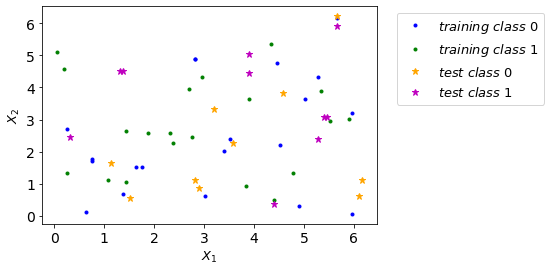

In [52]:
import numpy as np
import math 
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize, minimize_scalar
from scipy import integrate
%matplotlib inline

#plt.rcParams.update({'font.size': 14})
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 13}

mpl.rc('font', **font)

def example_inline():
    plt.clf()
x0_train=[]
y0_train=[]
x0_test=[]
y0_test=[]
x1_train=[]
y1_train=[]
x1_test=[]
y1_test=[]
    
#plt.figure(1)    
for i in range(0, len(datapoints_train[0])):
    if datapoints_train[1][i]==0 :
        x0_train.append(datapoints_train[0][i][0])
        y0_train.append(datapoints_train[0][i][1])
        
        #plt.plot(datapoints_train[0][i][0], datapoints_train[0][i][1], linestyle='', linewidth = 3, 
             #marker='o', markersize=3, color='blue', label= r'$Result ~from~ curve~ fitting$')
    else:
        x1_train.append(datapoints_train[0][i][0])
        y1_train.append(datapoints_train[0][i][1])
        #plt.plot(datapoints_train[0][i][0], datapoints_train[0][i][1], linestyle='', linewidth = 3, 
                 #marker='o', markersize=3, color='green', label= r'$Result ~from~ curve$')
        

        
for i in range(0, len(datapoints[0])):
    if datapoints[1][i]==0 :
        x0_test.append(datapoints[0][i][0])
        y0_test.append(datapoints[0][i][1])
        #plt.plot(datapoints[0][i][0], datapoints[0][i][1], linestyle='', linewidth = 3, 
             #marker='*', markersize=7, color='orange')
    else:
        x1_test.append(datapoints[0][i][0])
        y1_test.append(datapoints[0][i][1])
        #plt.plot(datapoints[0][i][0], datapoints[0][i][1], linestyle='', linewidth = 3, 
                 #marker='*', markersize=7, color='m')    
    #plt.xlabel(r'$\mathbf{X_1}$')
    #plt.ylabel(r'$\mathbf{x_2}$')
#plt.legend()
    #plt.show()
print(len(x0_train)-len(y0_train))

    
plt.figure(1)

plt.plot(x0_train, y0_train, linewidth = 3, linestyle='', marker='o', markersize=3, color='b', label= r'$training ~class~ 0$')

plt.plot(x1_train, y1_train, linewidth = 3, linestyle='', marker='o', markersize=3, color='green', label= r'$training ~class~ 1$')

plt.plot(x0_test, y0_test, linewidth = 3, linestyle='', marker='*', markersize=7, color='orange', label= r'$test ~class~ 0$')

plt.plot(x1_test, y1_test, linewidth = 3, linestyle='', marker='*', markersize=7, color='m', label= r'$test ~class~ 1$')

plt.ylabel(r'$X_2$')
plt.xlabel(r'$X_1$')
#plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()
    


0


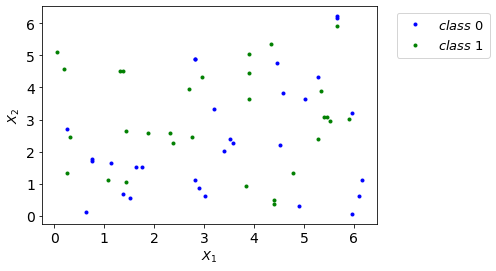

In [90]:
import numpy as np
import math 
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize, minimize_scalar
from scipy import integrate
%matplotlib inline

#plt.rcParams.update({'font.size': 14})
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 13}

mpl.rc('font', **font)

def example_inline():
    plt.clf()
x0_train=[]
y0_train=[]
x0_test=[]
y0_test=[]
x1_train=[]
y1_train=[]
x1_test=[]
y1_test=[]
    
#plt.figure(1)    
for i in range(0, len(datapoints_train[0])):
    if datapoints_train[1][i]==0 :
        x0_train.append(datapoints_train[0][i][0])
        y0_train.append(datapoints_train[0][i][1])
        
        #plt.plot(datapoints_train[0][i][0], datapoints_train[0][i][1], linestyle='', linewidth = 3, 
             #marker='o', markersize=3, color='blue', label= r'$Result ~from~ curve~ fitting$')
    else:
        x1_train.append(datapoints_train[0][i][0])
        y1_train.append(datapoints_train[0][i][1])
        #plt.plot(datapoints_train[0][i][0], datapoints_train[0][i][1], linestyle='', linewidth = 3, 
                 #marker='o', markersize=3, color='green', label= r'$Result ~from~ curve$')
        

        
for i in range(0, len(datapoints[0])):
    if datapoints[1][i]==0 :
        x0_test.append(datapoints[0][i][0])
        y0_test.append(datapoints[0][i][1])
        #plt.plot(datapoints[0][i][0], datapoints[0][i][1], linestyle='', linewidth = 3, 
             #marker='*', markersize=7, color='orange')
    else:
        x1_test.append(datapoints[0][i][0])
        y1_test.append(datapoints[0][i][1])
        #plt.plot(datapoints[0][i][0], datapoints[0][i][1], linestyle='', linewidth = 3, 
                 #marker='*', markersize=7, color='m')    
    #plt.xlabel(r'$\mathbf{X_1}$')
    #plt.ylabel(r'$\mathbf{x_2}$')
#plt.legend()
    #plt.show()
print(len(x0_train)-len(y0_train))

    
plt.figure(1)

plt.plot(x0_train, y0_train, linewidth = 3, linestyle='', marker='o', markersize=3, color='b', label= r'$class~ 0$')

plt.plot(x1_train, y1_train, linewidth = 3, linestyle='', marker='o', markersize=3, color='green', label= r'$class~ 1$')

plt.plot(x0_test, y0_test, linewidth = 3, linestyle='', marker='o', markersize=3, color='b')

plt.plot(x1_test, y1_test, linewidth = 3, linestyle='', marker='o', markersize=3, color='g')

plt.ylabel(r'$X_2$')
plt.xlabel(r'$X_1$')
#plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()
    


In [91]:
print(len(datapoints[0]), len(datapoints_train[0]))

20 40
